In [6]:
#Douglas Pinheiro Boza

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

componentes = pd.read_csv('componentes-curriculares-presenciais.csv', sep=";")

turmas20171 = pd.read_csv('turmas-2017.1.csv', sep=";")
turmas20161 = pd.read_csv('turmas-2016.1.csv', sep=";")
turmas20162 = pd.read_csv('turmas-2016.2.csv', sep=";")
turmas20151 = pd.read_csv('turmas-2015.1.csv', sep=";")
turmas20152 = pd.read_csv('turmas-2015.2.csv', sep=";")
turmas20141 = pd.read_csv('turmas-2014.1.csv', sep=";")
turmas20142 = pd.read_csv('turmas-2014.2.csv', sep=";")

matriculas20171 = pd.read_csv('matricula-componente-20171.csv', sep=";") 
matriculas20162 = pd.read_csv('matricula-componente-20162.csv', sep=";")
matriculas20161 = pd.read_csv('matricula-componente-20161.csv', sep=";")
matriculas20152 = pd.read_csv('matricula-componente-20152.csv', sep=";")
matriculas20151 = pd.read_csv('matricula-componente-20151.csv', sep=";")
matriculas20141 = pd.read_csv('matricula-componente-20141.csv', sep=";")
matriculas20142 = pd.read_csv('matricula-componente-20142.csv', sep=";")


def matriculas_disciplina(id_componente):
    t20171_imd = turmas20171[((turmas20171["id_componente_curricular"] == id_componente[0]) & (turmas20171['situacao_turma'].str.contains("CONSOLIDADA")))]
    t20161_imd = turmas20161[((turmas20161["id_componente_curricular"] == id_componente[0]) & (turmas20161["situacao_turma"].str.contains("CONSOLIDADA")))]
    t20162_imd = turmas20162[((turmas20162["id_componente_curricular"] == id_componente[0]) & (turmas20162["situacao_turma"].str.contains("CONSOLIDADA")))]
    t20151_imd = turmas20151[((turmas20151["id_componente_curricular"] == id_componente[0]) & (turmas20151["situacao_turma"].str.contains("CONSOLIDADA")))]
    t20152_imd = turmas20152[((turmas20152["id_componente_curricular"] == id_componente[0]) & (turmas20152["situacao_turma"].str.contains("CONSOLIDADA")))]
    t20141_imd = turmas20141[((turmas20141["id_componente_curricular"] == id_componente[0]) & (turmas20141["situacao_turma"].str.contains("CONSOLIDADA")))]
    t20142_imd = turmas20142[((turmas20142["id_componente_curricular"] == id_componente[0]) & (turmas20142["situacao_turma"].str.contains("CONSOLIDADA")))]

    mat20171_imd = matriculas20171.loc[matriculas20171['id_turma'].isin(t20171_imd["id_turma"])]
    mat20161_imd = matriculas20161.loc[matriculas20161['id_turma'].isin(t20161_imd["id_turma"])]
    mat20162_imd = matriculas20162.loc[matriculas20162['id_turma'].isin(t20162_imd["id_turma"])]
    mat20151_imd = matriculas20151.loc[matriculas20151['id_turma'].isin(t20151_imd["id_turma"])]
    mat20152_imd = matriculas20152.loc[matriculas20152['id_turma'].isin(t20152_imd["id_turma"])]
    mat20141_imd = matriculas20141.loc[matriculas20141['id_turma'].isin(t20141_imd["id_turma"])]
    mat20142_imd = matriculas20142.loc[matriculas20142['id_turma'].isin(t20142_imd["id_turma"])]

    matriculas_imd = pd.concat([mat20171_imd, mat20161_imd])
    matriculas_imd = pd.concat([matriculas_imd, mat20162_imd])
    matriculas_imd = pd.concat([matriculas_imd, mat20151_imd])
    matriculas_imd = pd.concat([matriculas_imd, mat20152_imd])
    matriculas_imd = pd.concat([matriculas_imd, mat20141_imd])
    matriculas_imd = pd.concat([matriculas_imd, mat20142_imd])     
    
    return matriculas_imd


def notas_list(matriculas, unidade):
    notas_list_imd = matriculas[matriculas["unidade"] == unidade]
    notas_list_imd = notas_list_imd.loc[notas_list_imd["nota"] >= 0]["nota"].tolist()
    return notas_list_imd

def notas_final_list(matriculas):
    notas_list_unfi = matriculas.drop_duplicates(['id_turma', 'discente'])
    notas_list_unfi = notas_list_unfi.loc[notas_list_unfi["media_final"] >= 0]["media_final"].tolist()
    return notas_list_unfi

def variances(media_notas, notas_list):
    variances = [(i - media_notas) ** 2 for i in notas_list]
    return variances

def variance(variances):
    return (sum(variances)/ len(variances))

def standard_deviation(variance):
    return variance ** (1/2)


print("ok")

ok


In [7]:
# dados probabildiade imd0033
id_componente_imd0033 = componentes[componentes['codigo'].str.contains("IMD0033")]
id_componente_imd0033 = id_componente_imd0033[id_componente_imd0033['nome'].str.contains("PROBABILIDADE")]["id_componente"].values

matriculas_imd0033 = matriculas_disciplina(id_componente_imd0033);

notas_list_imd0033_un1 = notas_list(matriculas_imd0033, 1)
notas_list_imd0033_un2 = notas_list(matriculas_imd0033, 2)
notas_list_imd0033_un3 = notas_list(matriculas_imd0033, 3)
notas_list_imd0033_unfi = notas_final_list(matriculas_imd0033)

media_notas_imd0033_un1 = np.mean(notas_list_imd0033_un1)
media_notas_imd0033_un2 = np.mean(notas_list_imd0033_un2)
media_notas_imd0033_un3 = np.mean(notas_list_imd0033_un3)
media_notas_imd0033_unfi = np.mean(notas_list_imd0033_unfi)

variances_imd0033_un1 = variances(media_notas_imd0033_un1, notas_list_imd0033_un1)
variances_imd0033_un2 = variances(media_notas_imd0033_un2, notas_list_imd0033_un2)
variances_imd0033_un3 = variances(media_notas_imd0033_un3, notas_list_imd0033_un3)
variances_imd0033_unfi = variances(media_notas_imd0033_unfi, notas_list_imd0033_unfi)

variance_imd0033_un1 = variance(variances_imd0033_un1)
variance_imd0033_un2 = variance(variances_imd0033_un2)
variance_imd0033_un3 = variance(variances_imd0033_un3)
variance_imd0033_unfi = variance(variances_imd0033_unfi)

standard_deviation_imd0033_un1 = standard_deviation(variance_imd0033_un1)
standard_deviation_imd0033_un2 = standard_deviation(variance_imd0033_un2)
standard_deviation_imd0033_un3 = standard_deviation(variance_imd0033_un3)
standard_deviation_imd0033_unfi = standard_deviation(variance_imd0033_unfi)

print("ok")

ok


In [8]:
# dados fmc i IMD0028 
id_componente_imd0028 = componentes[componentes['codigo'].str.contains("IMD0028")]
id_componente_imd0028 = id_componente_imd0028[id_componente_imd0028['nome'].str.contains("FUNDAMENTOS MATEMÁTICOS")]["id_componente"].values

matriculas_imd0028 = matriculas_disciplina(id_componente_imd0028);

notas_list_imd0028_un1 = notas_list(matriculas_imd0028, 1)
notas_list_imd0028_un2 = notas_list(matriculas_imd0028, 2)
notas_list_imd0028_un3 = notas_list(matriculas_imd0028, 3)
notas_list_imd0028_unfi = notas_final_list(matriculas_imd0028)

media_notas_imd0028_un1 = np.mean(notas_list_imd0028_un1)
media_notas_imd0028_un2 = np.mean(notas_list_imd0028_un2)
media_notas_imd0028_un3 = np.mean(notas_list_imd0028_un3)
media_notas_imd0028_unfi = np.mean(notas_list_imd0028_unfi)

variances_imd0028_un1 = variances(media_notas_imd0028_un1, notas_list_imd0028_un1)
variances_imd0028_un2 = variances(media_notas_imd0028_un2, notas_list_imd0028_un2)
variances_imd0028_un3 = variances(media_notas_imd0028_un3, notas_list_imd0028_un3)
variances_imd0028_unfi = variances(media_notas_imd0028_unfi, notas_list_imd0028_unfi)

variance_imd0028_un1 = variance(variances_imd0028_un1)
variance_imd0028_un2 = variance(variances_imd0028_un2)
variance_imd0028_un3 = variance(variances_imd0028_un3)
variance_imd0028_unfi = variance(variances_imd0028_unfi)

standard_deviation_imd0028_un1 = standard_deviation(variance_imd0028_un1)
standard_deviation_imd0028_un2 = standard_deviation(variance_imd0028_un2)
standard_deviation_imd0028_un3 = standard_deviation(variance_imd0028_un3)
standard_deviation_imd0028_unfi = standard_deviation(variance_imd0028_unfi)

print("ok")

ok


In [9]:
# dados fmc ii IMD0038 
id_componente_imd0038 = componentes[componentes['codigo'].str.contains("IMD0038")]
id_componente_imd0038 = id_componente_imd0038[id_componente_imd0038['nome'].str.contains("FUNDAMENTOS MATEMÁTICOS")]["id_componente"].values

matriculas_imd0038 = matriculas_disciplina(id_componente_imd0038);

notas_list_imd0038_un1 = notas_list(matriculas_imd0038, 1)
notas_list_imd0038_un2 = notas_list(matriculas_imd0038, 2)
notas_list_imd0038_un3 = notas_list(matriculas_imd0038, 3)
notas_list_imd0038_unfi = notas_final_list(matriculas_imd0038)

media_notas_imd0038_un1 = np.mean(notas_list_imd0038_un1)
media_notas_imd0038_un2 = np.mean(notas_list_imd0038_un2)
media_notas_imd0038_un3 = np.mean(notas_list_imd0038_un3)
media_notas_imd0038_unfi = np.mean(notas_list_imd0038_unfi)

variances_imd0038_un1 = variances(media_notas_imd0038_un1, notas_list_imd0038_un1)
variances_imd0038_un2 = variances(media_notas_imd0038_un2, notas_list_imd0038_un2)
variances_imd0038_un3 = variances(media_notas_imd0038_un3, notas_list_imd0038_un3)
variances_imd0038_unfi = variances(media_notas_imd0038_unfi, notas_list_imd0038_unfi)

variance_imd0038_un1 = variance(variances_imd0038_un1)
variance_imd0038_un2 = variance(variances_imd0038_un2)
variance_imd0038_un3 = variance(variances_imd0038_un3)
variance_imd0038_unfi = variance(variances_imd0038_unfi)

standard_deviation_imd0038_un1 = standard_deviation(variance_imd0038_un1)
standard_deviation_imd0038_un2 = standard_deviation(variance_imd0038_un2)
standard_deviation_imd0038_un3 = standard_deviation(variance_imd0038_un3)
standard_deviation_imd0038_unfi = standard_deviation(variance_imd0038_unfi)

print("ok")

ok


Populating the interactive namespace from numpy and matplotlib


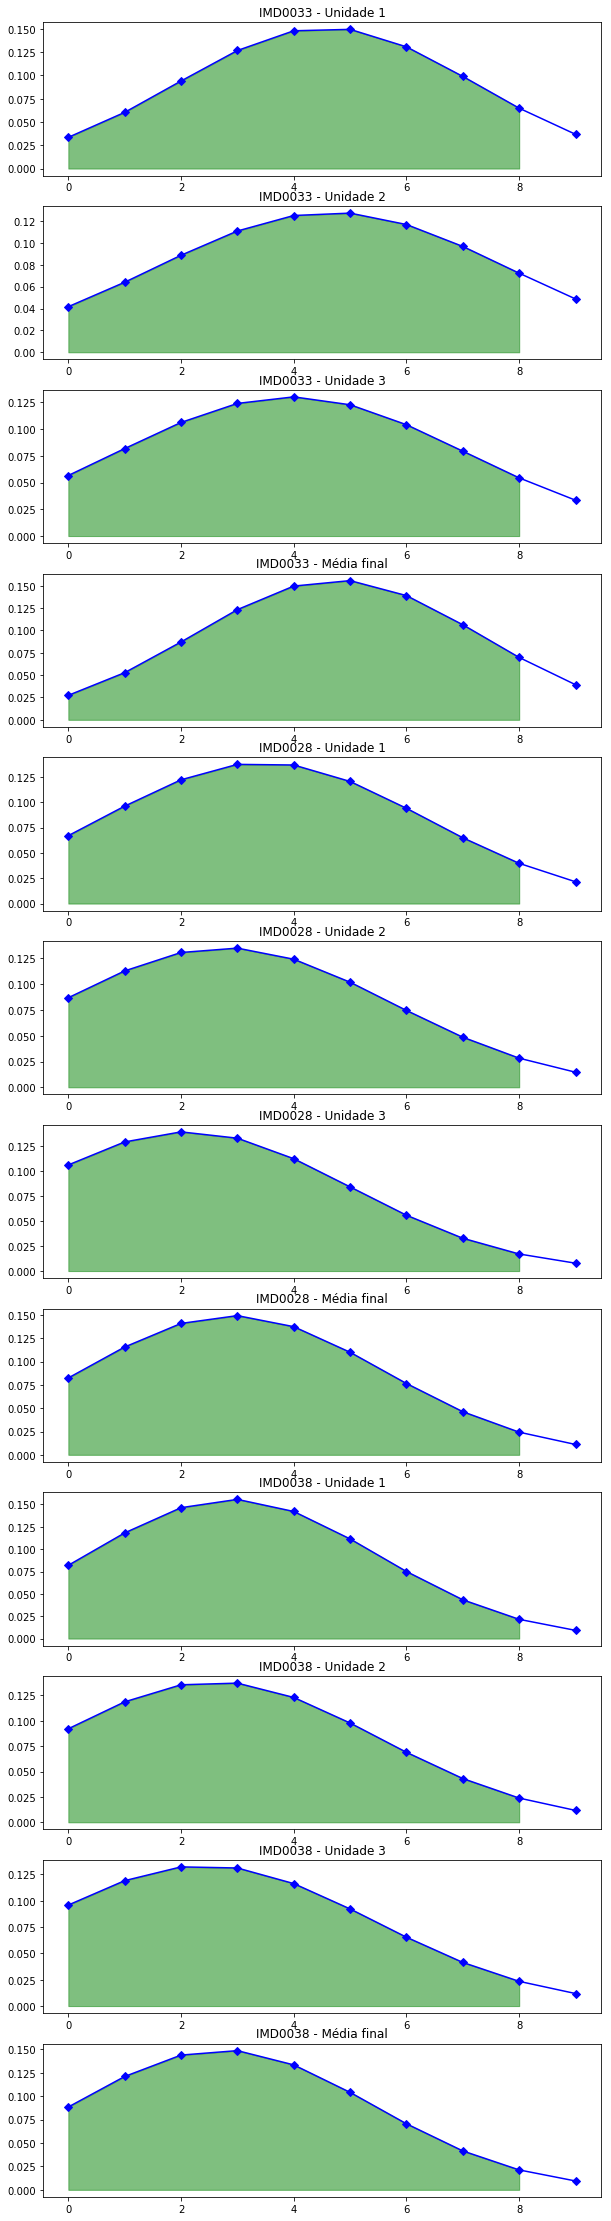

In [10]:
%pylab inline
#pylab.rcParams['figure.figsize'] = (10, 8)

fig, axeszs = plt.subplots(nrows=12, ncols=1, figsize=(10,40))

axis_x = range(0,10)
xi = 9

def gerar_grafico(media, desvio_padrao, titulo, num):    
    pdf = stats.norm.pdf(axis_x, media, desvio_padrao)
    axeszs[num].plot(axis_x, pdf, '-bD')
    axeszs[num].fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)
    axeszs[num].title.set_text(titulo)    

gerar_grafico(media_notas_imd0033_un1, standard_deviation_imd0033_un1, "IMD0033 - Unidade 1", 0)
gerar_grafico(media_notas_imd0033_un2, standard_deviation_imd0033_un2, "IMD0033 - Unidade 2", 1)
gerar_grafico(media_notas_imd0033_un3, standard_deviation_imd0033_un3, "IMD0033 - Unidade 3", 2)
gerar_grafico(media_notas_imd0033_unfi, standard_deviation_imd0033_unfi, "IMD0033 - Média final", 3)

gerar_grafico(media_notas_imd0028_un1, standard_deviation_imd0028_un1, "IMD0028 - Unidade 1", 4)
gerar_grafico(media_notas_imd0028_un2, standard_deviation_imd0028_un2, "IMD0028 - Unidade 2", 5)
gerar_grafico(media_notas_imd0028_un3, standard_deviation_imd0028_un3, "IMD0028 - Unidade 3", 6)
gerar_grafico(media_notas_imd0028_unfi, standard_deviation_imd0028_unfi, "IMD0028 - Média final", 7)

gerar_grafico(media_notas_imd0038_un1, standard_deviation_imd0038_un1, "IMD0038 - Unidade 1", 8)
gerar_grafico(media_notas_imd0038_un2, standard_deviation_imd0038_un2, "IMD0038 - Unidade 2", 9)
gerar_grafico(media_notas_imd0038_un3, standard_deviation_imd0038_un3, "IMD0038 - Unidade 3", 10)
gerar_grafico(media_notas_imd0038_unfi, standard_deviation_imd0038_unfi, "IMD0038 - Média final", 11)

plt.show()

#cdf


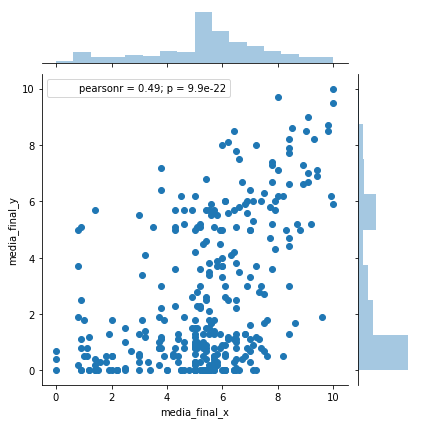

In [11]:
# 2
from scipy.stats.stats import pearsonr

dis_imd0028 = matriculas_imd0028.drop_duplicates(['id_turma', 'discente'])
dis_imd0038 = matriculas_imd0038.drop_duplicates(['id_turma', 'discente'])

#dis_imd0038 fmc ii y
#dis_imd0028 fmc i x

dis = dis_imd0028.merge(dis_imd0038, left_on='discente', right_on='discente', how='inner')

dis = dis.loc[((dis['media_final_x'] >= 0) & (dis['media_final_y'] >= 0))]    

r, p_value = pearsonr(dis["media_final_x"], dis["media_final_y"])
sns.jointplot(x=dis["media_final_x"], y=dis["media_final_y"])

plt.show()
